****Problem Statement:****
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data=pd.read_csv("Mall_Customers.csv")
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
data.shape

(200, 5)

In [24]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [26]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [27]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

C:\Users\hp\AppData\Local\Temp\ipykernel_18444\3873052088.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'],color='g')
C:\Users\hp\AppData\Local\Temp\ipykernel_18444\3873052088.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Annual Income (k$)'],color='y')
C:\Users\hp\App

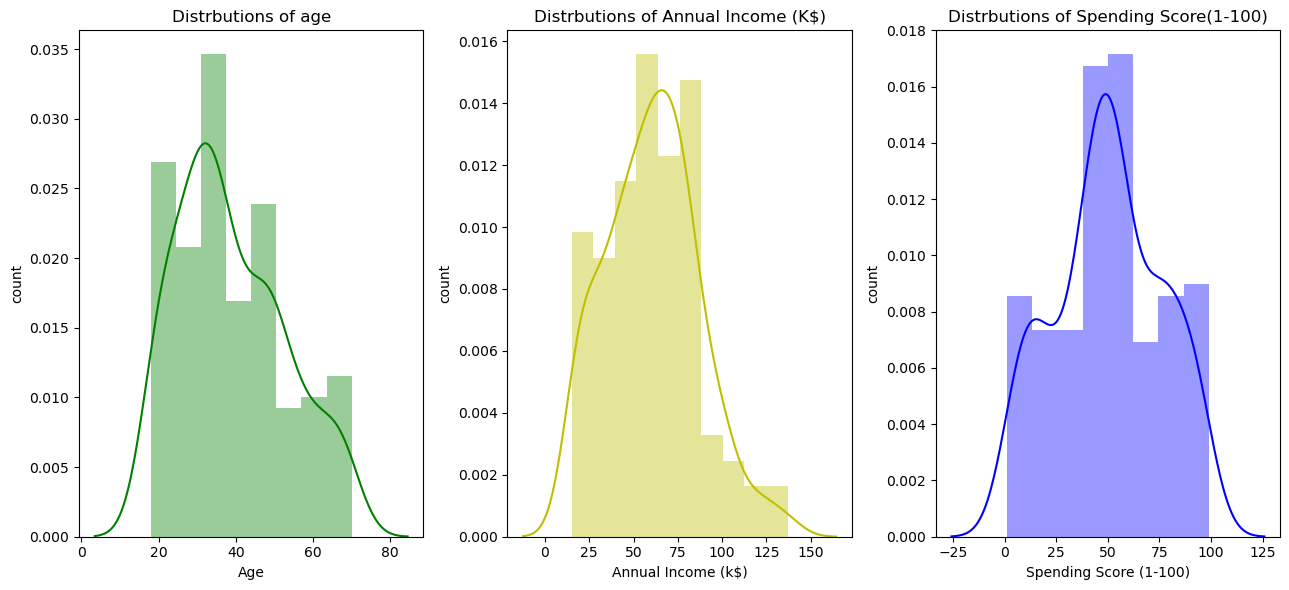

In [28]:
plt.figure(figsize=(13,6))

plt.subplot(1,3,1)
sns.distplot(data['Age'],color='g')
plt.title("Distrbutions of age")
plt.ylabel("count")

plt.subplot(1,3,2)
sns.distplot(data['Annual Income (k$)'],color='y')
plt.title("Distrbutions of Annual Income (K$)")
plt.ylabel("count")

plt.subplot(1,3,3)
sns.distplot(data['Spending Score (1-100)'],color='b')
plt.title("Distrbutions of Spending Score(1-100)")
plt.ylabel("count")

plt.tight_layout()


plt.show()

In [29]:
df=data.groupby("Gender").size()
df

Gender
Female    112
Male       88
dtype: int64

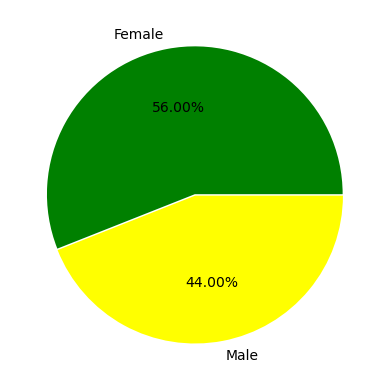

In [30]:
df.plot(kind='pie',
        colors=['green','yellow'],
        explode=[0,0.01],
        labels=['Female','Male'],
        autopct='%0.2F%%')
plt.show()

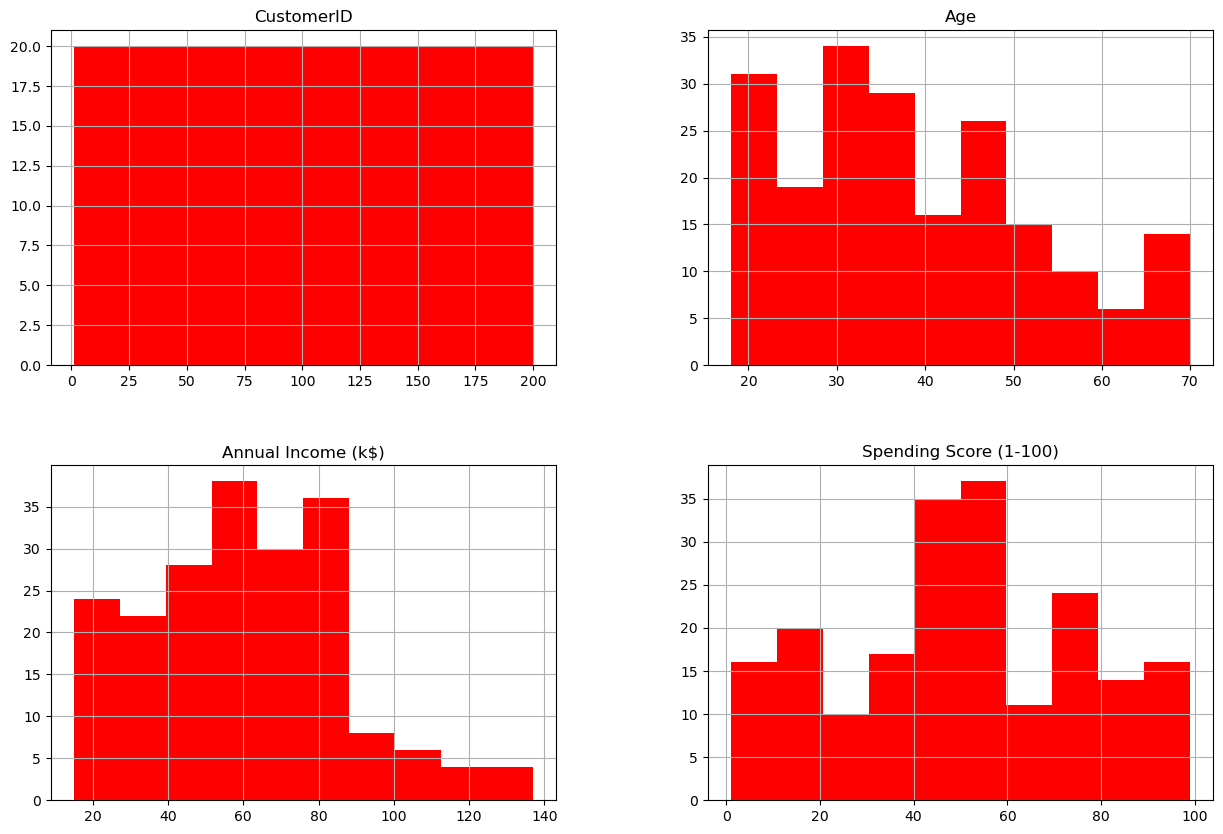

In [31]:
data.hist(figsize=(15,10),color='r',grid=True)
plt.show()

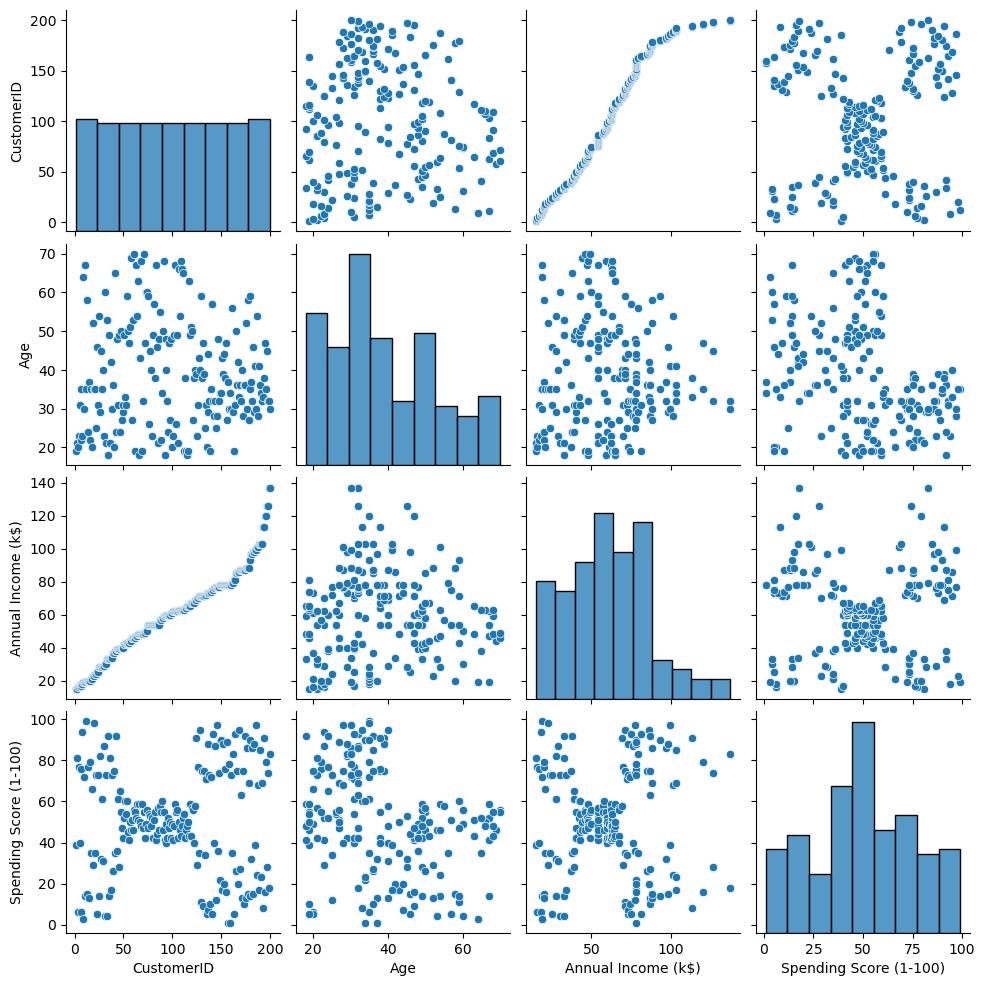

In [32]:
sns.pairplot(data)
plt.show()

****'Spending Score (1-100)' vs 'Annual Income (k$)'****

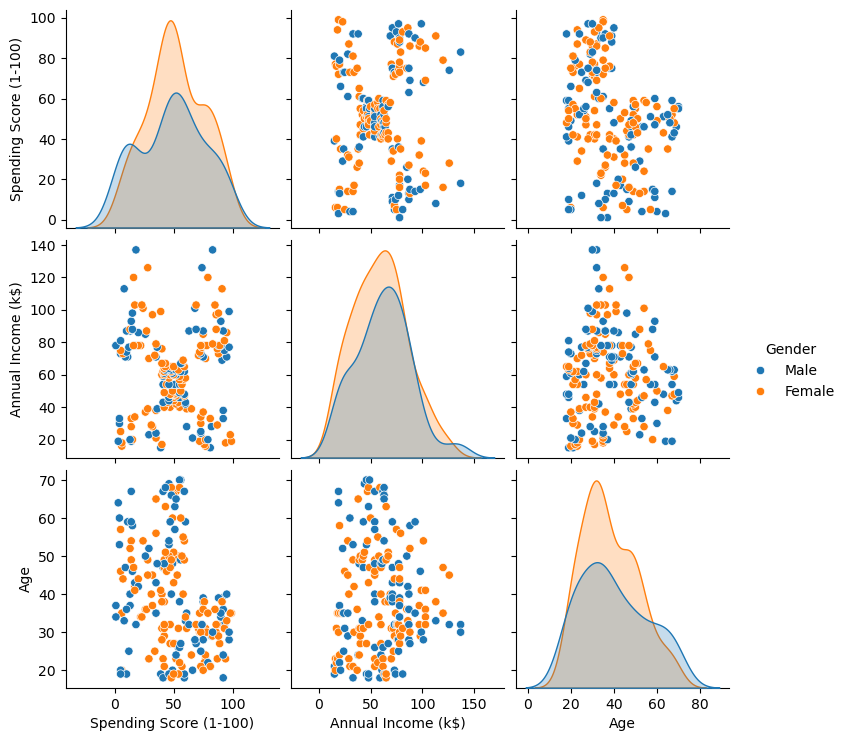

In [33]:
sns.pairplot(data,vars=['Spending Score (1-100)',
                          'Annual Income (k$)', 'Age'],hue="Gender")

In [34]:
pip install dabl


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


****import dabl for basic Anlaysis****

In [35]:
import dabl

Target looks like regression


C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\dabl\plot\supervised.py:214: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = X_new.groupby(col)[target_col].median()


[<Axes: title={'center': 'Target distribution'}, xlabel='Spending Score (1...', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=-3.45E-01'}, xlabel='Age', ylabel='Spending Score (1...'>,
         <Axes: title={'center': 'F=7.84E-03'}, xlabel='Annual Income (k$)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=7.04E-02'}, xlabel='Spending Score (1-100)', ylabel='Gender'>]],
       dtype=object)]

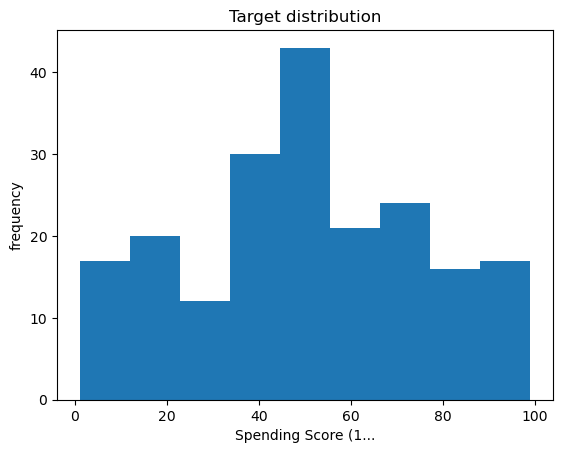

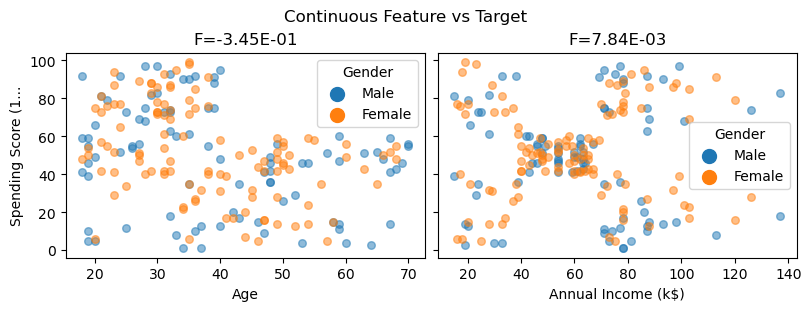

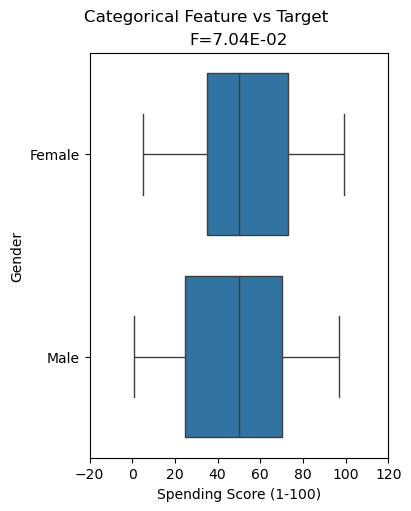

In [36]:
dabl.plot(data,target_col='Spending Score (1-100)')

Target looks like regression


C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\dabl\plot\supervised.py:214: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = X_new.groupby(col)[target_col].median()


[<Axes: title={'center': 'Target distribution'}, xlabel='Annual Income (k$)', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=1.98E-02'}, xlabel='Age', ylabel='Annual Income (k$)'>,
         <Axes: title={'center': 'F=7.84E-03'}, xlabel='Spending Score (1-100)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=6.11E-03'}, xlabel='Annual Income (k$)', ylabel='Gender'>]],
       dtype=object)]

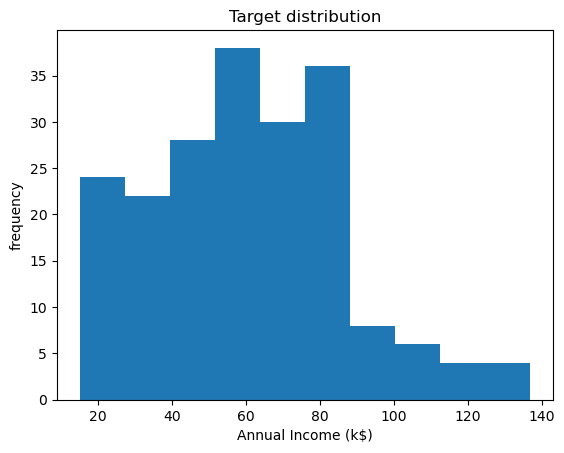

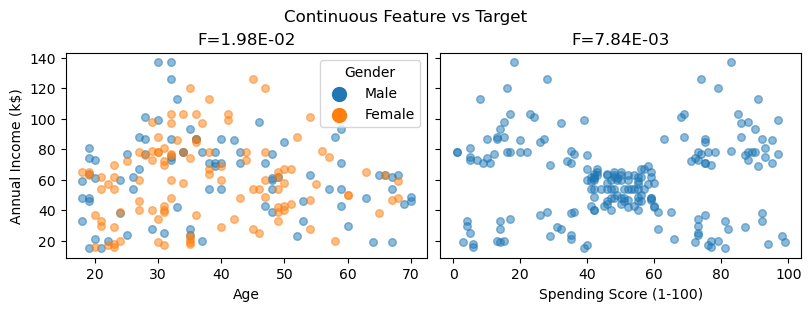

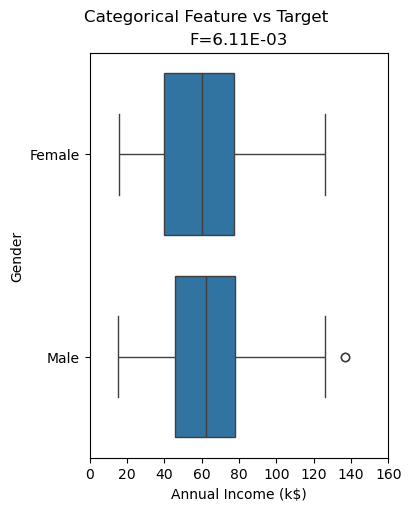

In [37]:
dabl.plot(data,target_col="Annual Income (k$)")

In [39]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

****Age vs Annual Income (k$)****

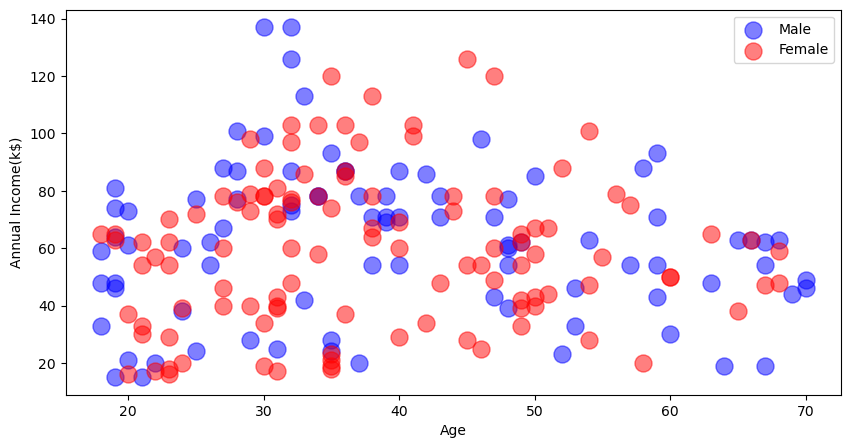

In [86]:
plt.figure(figsize=(10,5))
for gender ,color in zip(['Male','Female'],['blue','red']):
    plt.scatter(x = 'Age', y = 'Annual Income (k$)',
               data=data[data['Gender']==gender],
               s=150,
               alpha=0.5,
               label=gender,
                color=color
               )

plt.xlabel("Age")
plt.ylabel("Annual Income(k$)")
plt.legend()
plt.show()

****Annual income vs Spending Score****

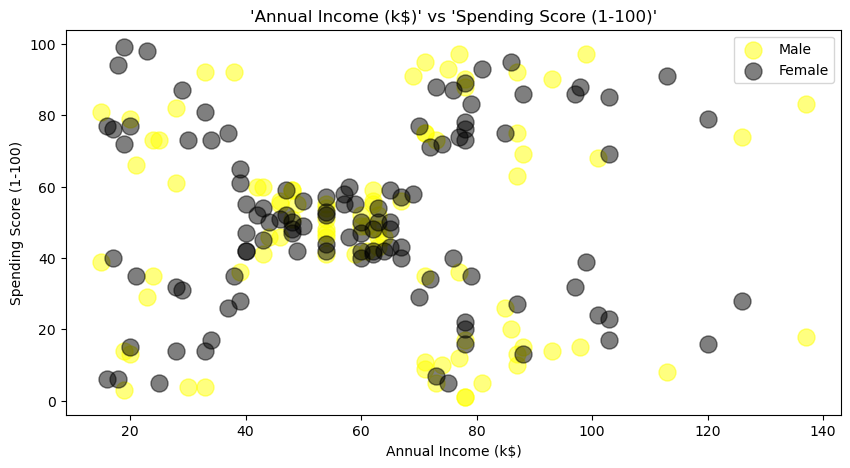

In [87]:
plt.figure(figsize=(10,5))
for gender,color in zip(['Male','Female'],['yellow','black']):
    plt.scatter(x='Annual Income (k$)',y='Spending Score (1-100)',
               data=data[data['Gender']==gender],
               s=150,
               alpha=0.5,
                label=gender,
                color=color
               )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title("'Annual Income (k$)' vs 'Spending Score (1-100)'")
plt.legend()
plt.show()

In [65]:
x=data.iloc[:,[3,4]].values


In [66]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

****Model building****

In [ ]:
from sklearn.cluster import KMeans

In [70]:
k=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(x)
    k.append(kmeans.inertia_)
    

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

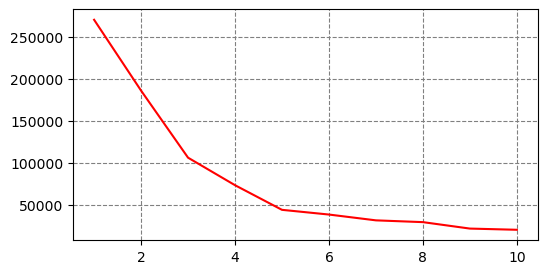

In [97]:
plt.figure(figsize=(6,3))
plt.plot(range(1,11),k,color='red')
plt.grid(color='gray',linestyle='--')
plt.show()

In [75]:
model=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmean=model.fit_predict(x)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


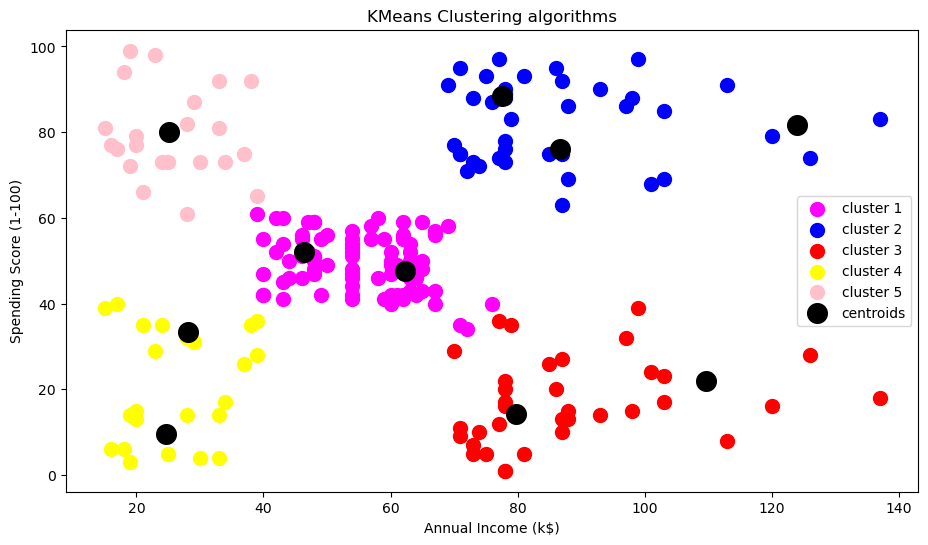

In [94]:
plt.figure(figsize=(11,6))
plt.scatter(x[y_kmean==0,0],x[y_kmean==0,1],s=100,c='magenta',label='cluster 1')
plt.scatter(x[y_kmean==1,0],x[y_kmean==1,1],s=100,c='blue',label='cluster 2')
plt.scatter(x[y_kmean==2,0],x[y_kmean==2,1],s=100,c='red',label='cluster 3')
plt.scatter(x[y_kmean==3,0],x[y_kmean==3,1],s=100,c='yellow',label='cluster 4')
plt.scatter(x[y_kmean==4,0],x[y_kmean==4,1],s=100,c='pink',label='cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='black',label="centroids")
plt.title("KMeans Clustering algorithms")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()
